<a href="https://colab.research.google.com/github/MARTINROCA/Data_Storytelling_Roca/blob/main/Desafio_AlgoritmoML_MVP_Roca_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
* Contexto empresarial: la empresa se dedica a la venta online de productos y se tomaron datos de diferentes usuarios en el período de un año. Cada registro corresponde a una sesión de usuarios distintos

* Contexto analítico: Se nos proporciona un archivo csv con las operaciones que realizó cada usuario en donde se registraron distintos indicadores y si la persona terminó adquiriendo el producto o no.

# Hipótesis:
* A mayor tiempo de duración en páginas similares mayor probabilidad de venta
* Mayor ExitRate menor probabilidad de compra
* Mayor PageValue mayor probabilidad de compra
* Las ventas crecen los fines de semana y los períodos anteriores a días especiales
* Hay estacionalidad en las compras
* La mayoria de las compras las realizan al volver a visitar la pagina

In [98]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [99]:
! pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
! pip install bqplot
! pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [102]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm
import chart_studio.plotly as py
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)
from itertools import count
import warnings
warnings.filterwarnings("ignore")
import pandas_profiling

In [103]:
df1 = pd.read_csv('/content/gdrive/MyDrive/DATA SCIENCE/online_shoppers_intention.csv')

In [104]:
d_desc = {'Administrative':'number of pages of this type (administrative) that the user visited.',
          'Administrative_Duration':'the amount of time spent in this category of pages.',
          'Informational':' the number of pages of this type (informational) that the user visited.',
          'Informational_Duration':'the amount of time spent in this category of pages.',
          'ProductRelated':' the number of pages of this type (product related) that the user visited. ',
          'ProductRelated_Duration':' the amount of time spent in this category of pages.',
          'BounceRates':'The percentage of visitors who enter the website through that page and exit without triggering any additional tasks. ',
          'ExitRates':'The percentage of pageviews on the website that end at that specific page.',
          'PageValues':'The average value of the page averaged over the value of the target page and/or the completion of an eCommerce',
          'SpecialDay':'closeness of the browsing date to special days or holidays in ',
          'Month':'the month the pageview occurred',
          'OperatingSystems':'An integer value representing the operating system that the user was on when viewing the page',
          'Browser':'the browser that the user was using to view the page. ',
          'Region':' integer value representing which region the user is located in ',
          'TrafficType':'An integer value representing what type of traffic the user is categorized into.',
          'VisitorType':'whether a visitor is New Visitor, Returning Visitor, or Other ',
          'Weekend':' boolean representing whether the session is on a weekend.',
          'Revenue':'boolean representing whether or not the user completed the purchase.'}

In [105]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [106]:
df1.shape

(12330, 18)

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Selección datos numéricos

In [108]:
df_num = df1.select_dtypes('number')
df_num['Revenue'] = df1['Revenue']
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,False


### Selección datos categóricos

In [109]:
df_categ = ['Month', 'VisitorType' 'Weekend']

### Valores duplicados

In [110]:
df_num.drop_duplicates(inplace=True)

In [111]:
len(df_num)

12016

# Análisis Univariado

### Variables Categóricas

In [112]:
col_categ = ['Month', 'VisitorType', 'Weekend', 'Revenue']

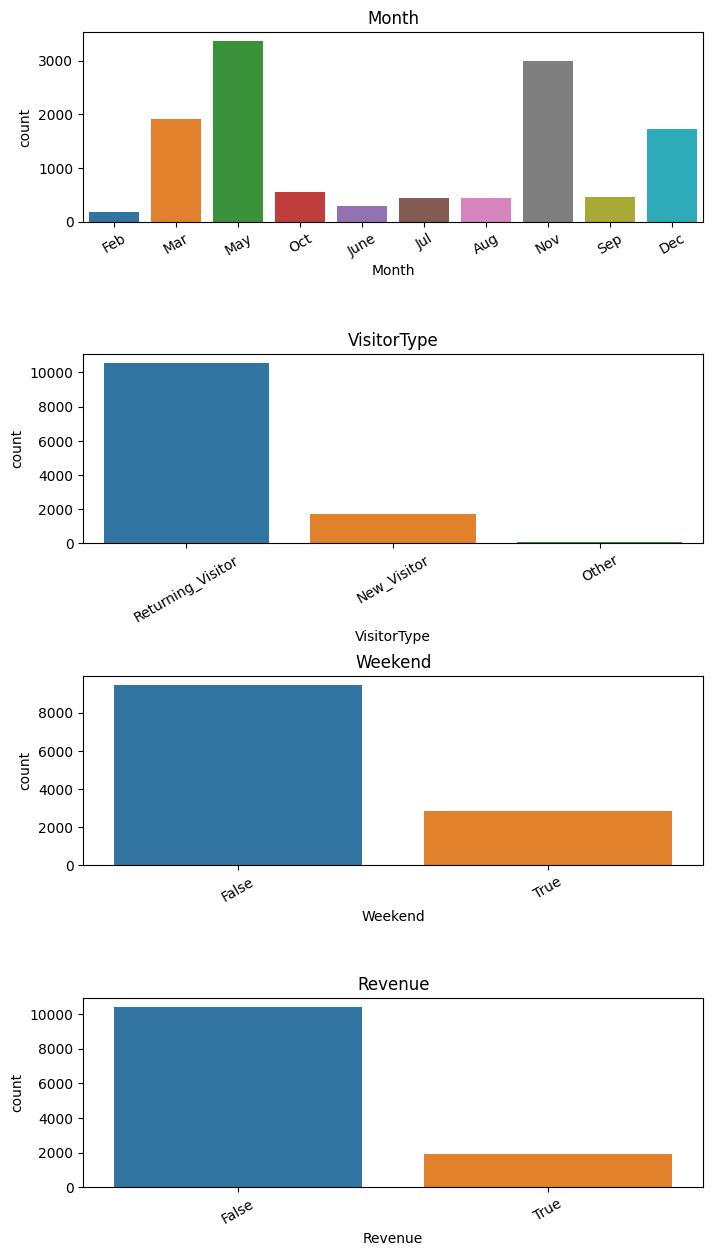

In [113]:
fig, ax = plt.subplots(nrows=len(col_categ), ncols=1, figsize=(8,15))
fig.subplots_adjust(hspace=0.7)

for i,col in enumerate(col_categ):
    sns.countplot(x=col, data=df1, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

([<matplotlib.axis.XTick at 0x7fd8daa03820>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

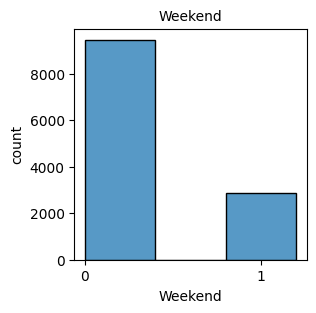

In [114]:
f, axs = plt.subplots(figsize=(3, 3))
sns.histplot(df1['Weekend'], binwidth=0.4, palette='pastel')
plt.title('Weekend', fontsize = 10)
plt.xlabel('Weekend', fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.xticks([0,1])

### Observaciones univariadas variables categóricas:

- **Month**: La variable muestra niveles importantes de actividad en los meses de Marzo, Mayo, Noviembre y Diciembre respecto del resto. Además se destaca que no hay datos ni en Enero ni en Abril.

- **VisitorType**: La mayoría de los usuarios son usuarios previos, hay muy poco ingreso de nuevos usuarios, sería bueno incrementar el ingreso de nuevos consumidores.

- **Weekend**: No se observa mayor flujo de ingresos a la web durante los fines de semana.

- **Revenue**: Aproximadamente un 20% de las visitas terminan con una compra de producto

### Variables numéricas

In [115]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12016.0,2.375666,3.343483,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12016.0,82.930548,178.584445,0.0,0.000000,11.000000,96.500000,3398.750000
Informational,12016.0,0.516728,1.284001,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12016.0,35.373225,142.464803,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12016.0,32.531708,44.772915,0.0,8.000000,19.000000,39.000000,705.000000
ProductRelated_Duration,12016.0,1225.963124,1928.617897,0.0,207.563103,630.413333,1501.208333,63973.522230
BounceRates,12016.0,0.017595,0.039660,0.0,0.000000,0.002632,0.015385,0.200000
ExitRates,12016.0,0.039000,0.042056,0.0,0.013947,0.025000,0.046154,0.200000
PageValues,12016.0,6.043155,18.784765,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12016.0,0.062883,0.201055,0.0,0.000000,0.000000,0.000000,1.000000


Observaciones iniciales sobre cuadro:
- Se observa una diferencia relativa importante entre el valor máximo y el promedio en las variables Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration. En particular las variables Informational parecen presentar en su mayoría valores cero, ya que se encuentran hasta su tercer cuartil. Deberemos analizar posible tratamiento de Outliers sobre las mismas.
- PageValues y SpecialDay también presentan valores cero hasta su tercer cuartil.

In [116]:
col_num = ['Administrative','Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser',
           'Region', 'TrafficType']

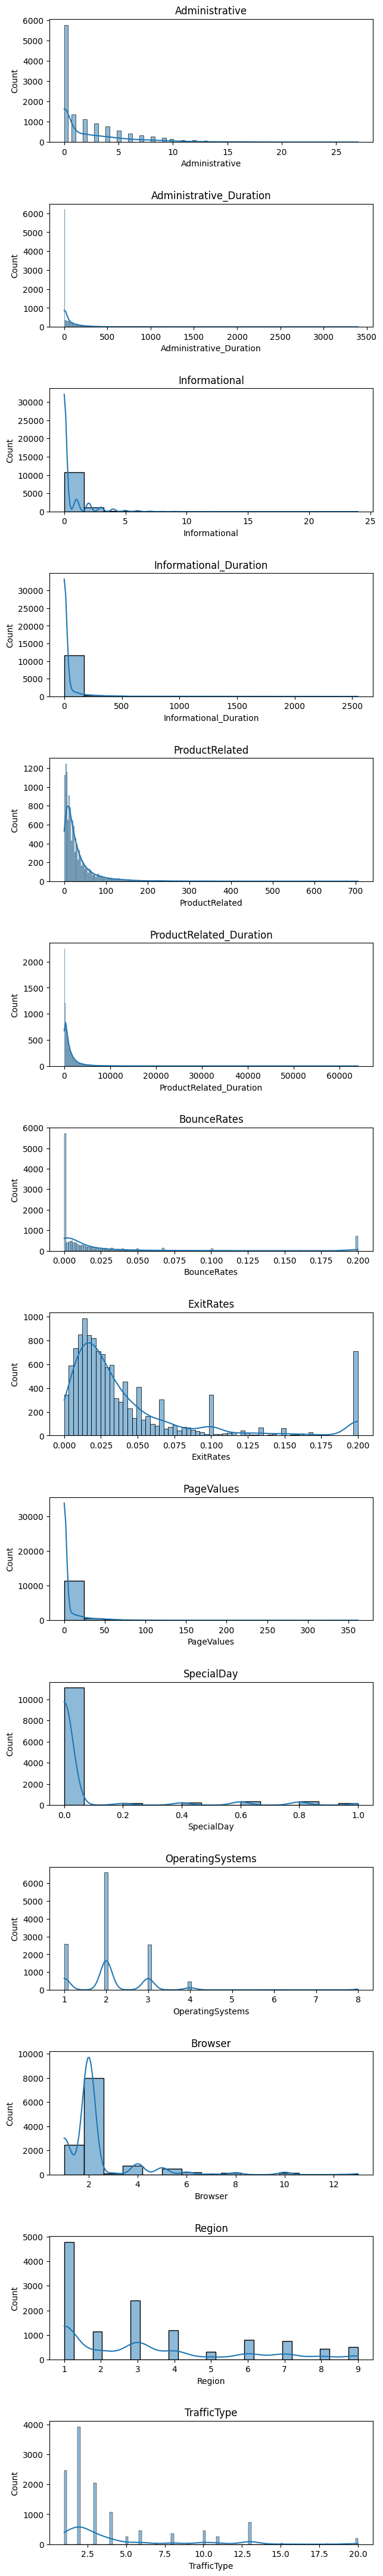

In [117]:
fig, ax = plt.subplots( nrows=len(col_num), figsize=(7,55))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate (col_num):
    sns.histplot(x=col, data=df1, ax=ax[i], kde=True)
    ax[i].set_title(col)


### Observacciones:
* **Administrative y Administrative_Duration, Information y Information_Duration**: Las 4 variables presentan gran cantidad de valores cero, analizar relación con variable a predecir.
* **ProductRelated y Duration**: se observan outliers cuando los potenciales clientes ven muchos productos relacionados y pasan mucho tiempo, sin embargo se espera que puedan ser datos importantes y muy relacionados a la compra final
* **SpecialDay**: ocurre lo mismo, los valores mayores a 0 se presentan como outliers pero debemos ver si tienen mucha relación con la compra final
* **Region, Browser, Traffic Type y OperatingSystems**: se observan casos donde no se realizan muchas transacciones. Se recomienda realizar algún tratamiento de Outliers.
* Las variables restantes no presentan observaciones relevantes, se analizará su relación respecto a la variable a predecir.

ProductRelated  the number of pages of this type (product related) that the user visited. 


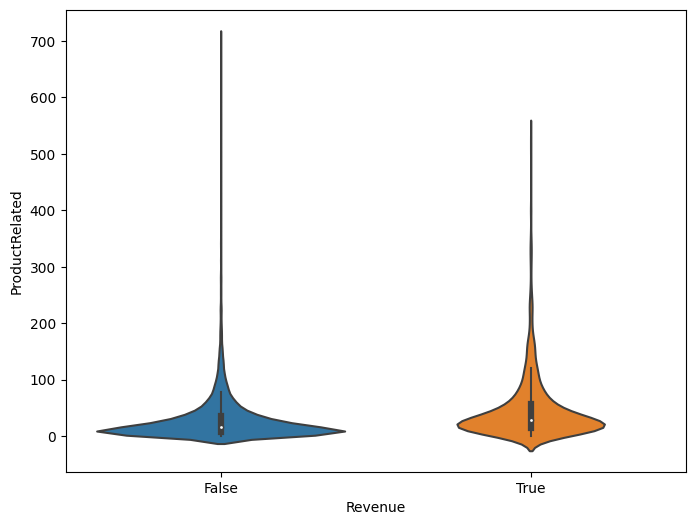

ProductRelated_Duration  the amount of time spent in this category of pages.


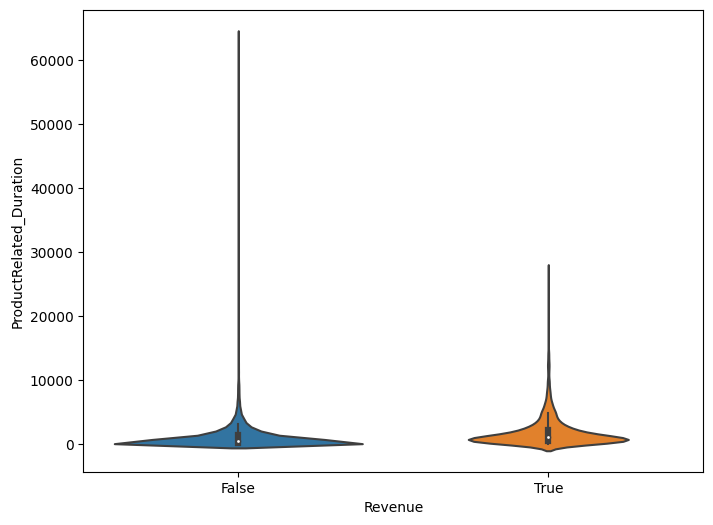

SpecialDay closeness of the browsing date to special days or holidays in 


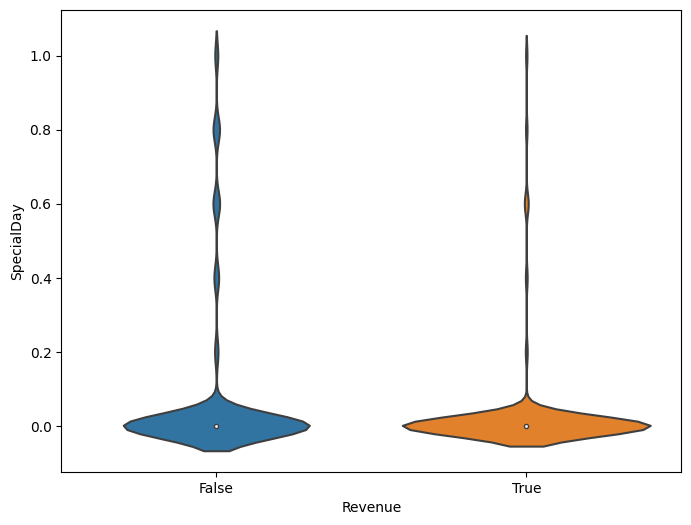

Region  integer value representing which region the user is located in 


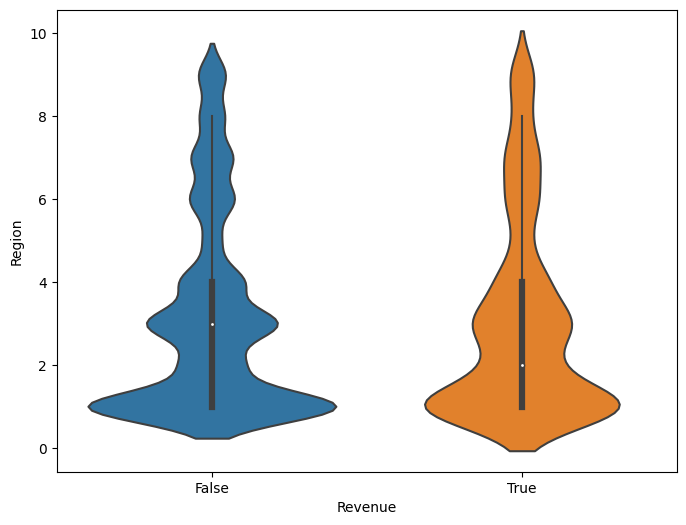

Browser the browser that the user was using to view the page. 


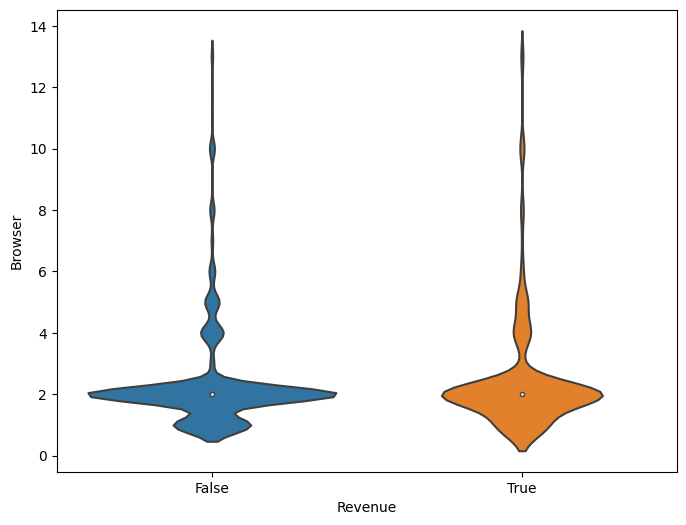

OperatingSystems An integer value representing the operating system that the user was on when viewing the page


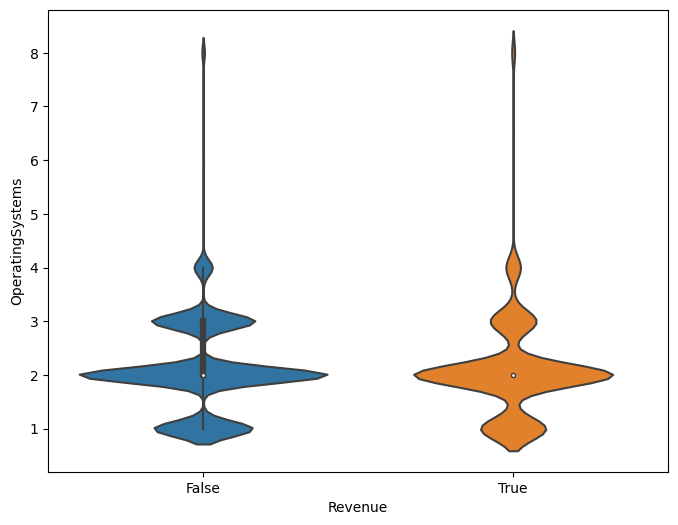

In [118]:
for col in ['ProductRelated', 'ProductRelated_Duration', 'SpecialDay', 'Region', 'Browser', 'OperatingSystems']:
    print(col, d_desc[col])
    sns.violinplot(x='Revenue', y=col, data=df_num)
    plt.show()

Reemplazamos los Outliers de ProductRelated_Duration por el tope intercuartil

In [119]:
Q1 = df1['ProductRelated_Duration'].quantile(0.25)
Q3 = df1['ProductRelated_Duration'].quantile(0.75)

IQR = Q3-Q1

tope = Q3+1.5*IQR
tope


3384.1867837500004

In [120]:
df_num['ProductRelated_Duration_tope'] = df_num['ProductRelated_Duration']
df_num.loc[df_num['ProductRelated_Duration_tope']>tope, 'ProductRelated_Duration_tope'] = tope

### Cambiamos variable Revenue a numérica

In [121]:
df_num.Revenue.unique()

array([False,  True])

In [122]:
df_num.Revenue.value_counts()

False    10108
True      1908
Name: Revenue, dtype: int64

In [123]:
df_num['Revenue'] = df_num['Revenue'].astype(int)

In [124]:
df_num.Revenue.unique()

array([0, 1])

In [125]:
df_num.Revenue.value_counts()

0    10108
1     1908
Name: Revenue, dtype: int64

([<matplotlib.axis.XTick at 0x7fd8d7a40ca0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

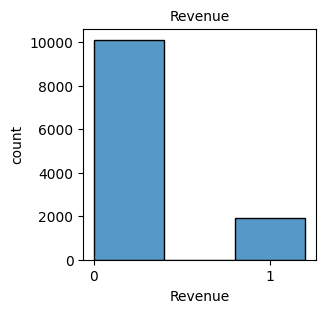

In [126]:
f, axs = plt.subplots(figsize=(3, 3))
sns.histplot(df_num['Revenue'], binwidth=0.4)
plt.title('Revenue', fontsize = 10)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.xticks([0,1])

# Relación variables con variable a predecir

In [127]:
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,ProductRelated_Duration_tope
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0.000000
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,64.000000
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0.000000
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,2.666667
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,627.500000


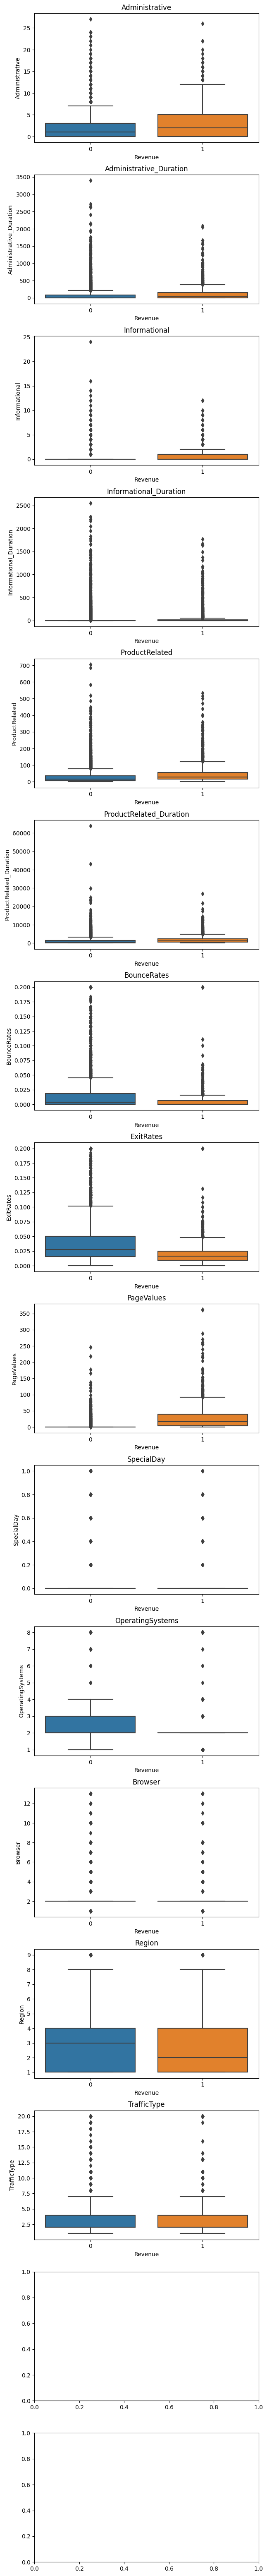

In [128]:
fig, ax = plt.subplots(nrows=len(df_num.columns), figsize=(7,80))
fig.subplots_adjust(hspace=0.25)

for i, col in enumerate(col_num):
    bplt = sns.boxplot(x='Revenue', y=col, data= df_num, ax=ax[i])
    ax[i].set_xlabel('Revenue')
    ax[i].set_title(col)

### Observaciones:
* **PageValues**: Esta variable parece ser la única que presenta relación directa con la variable a predecir

# Cálculo de Tasa de Conversión sobre una variable

In [129]:
def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):

    x,y = var_predictora, var_predecir

    grupo = df1.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    if type =='line':                        # PARA RANGOS CONTINUOS
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

    elif type == 'bar':                     # PARA CATEGORÍAS O RANGOS
        plt.figure(figsize=(14,6))
        sns.barplot(x= var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid()

    elif type == 'scatter':                 # PARA CATEGORIAS
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

### Tasas de conversión sobre variables principales sobre las que se considera pueden tener relación sobre la decisión de compra final:

*   Month
*   VisitorType
* Weekend
* ProductRelated
* PageValues
* Region




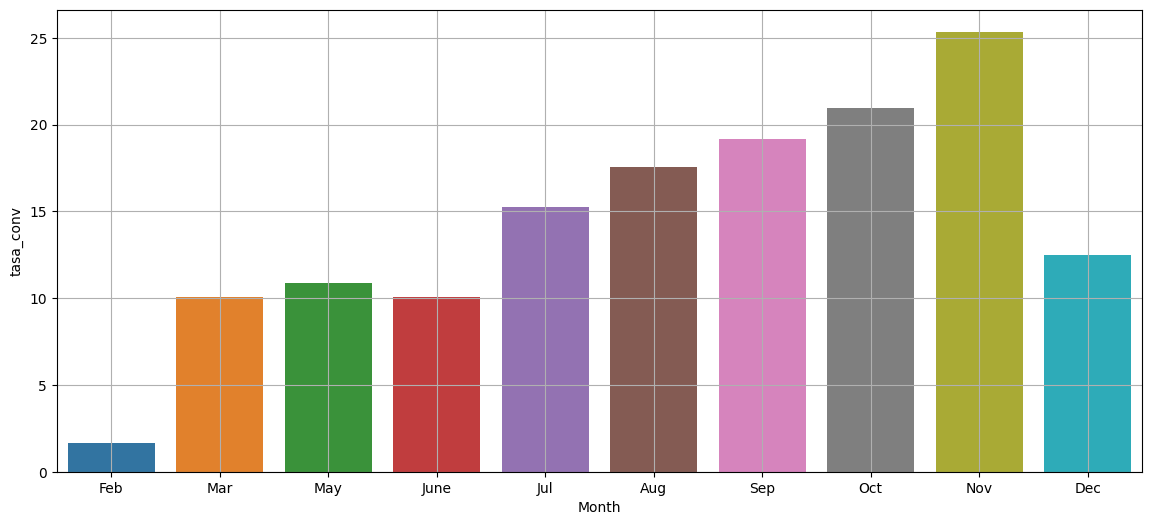

In [130]:
graficar_tasas_conversion('Month', 'Revenue', type='bar', order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])

In [131]:
month_count = df1.groupby('Month', as_index=False)['Revenue'].count()
month_count

,Month,Revenue
0,Aug,433
1,Dec,1727
2,Feb,184
3,Jul,432
4,June,288
5,Mar,1907
6,May,3364
7,Nov,2998
8,Oct,549
9,Sep,448


<Axes: xlabel='Month', ylabel='Revenue'>

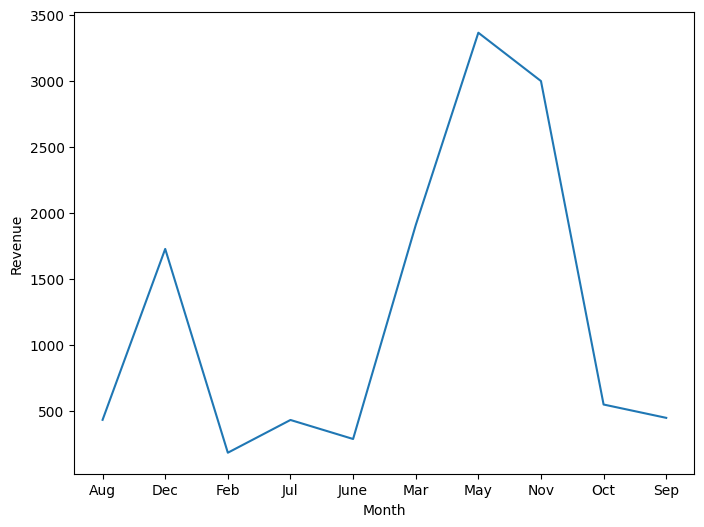

In [132]:
sns.lineplot(data=month_count, x="Month", y='Revenue', sort=False )

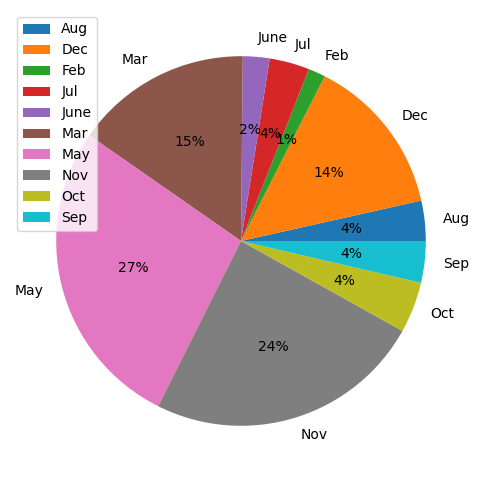

In [133]:
revenues = month_count['Revenue'].tolist()
labels = month_count['Month'].tolist()
plt.pie(revenues, labels= labels, autopct='%.0f%%')
plt.legend(loc= 'upper left')

### Month: se observa que los meses que más se utiliza la página son May, Nov, Mar y Dec. En esos 4 meses se acumula el 80% de las visitas.
Sin embargo, al observar la tasa de conversión deducimos que Jul, Aug, Sep, Oct y Nov, que son los meses de mayor tasa. Entre el 15% y 26% de las veces que se ingresa a la web se termina comprando el producto, son los meses con mayor decisión de compra.

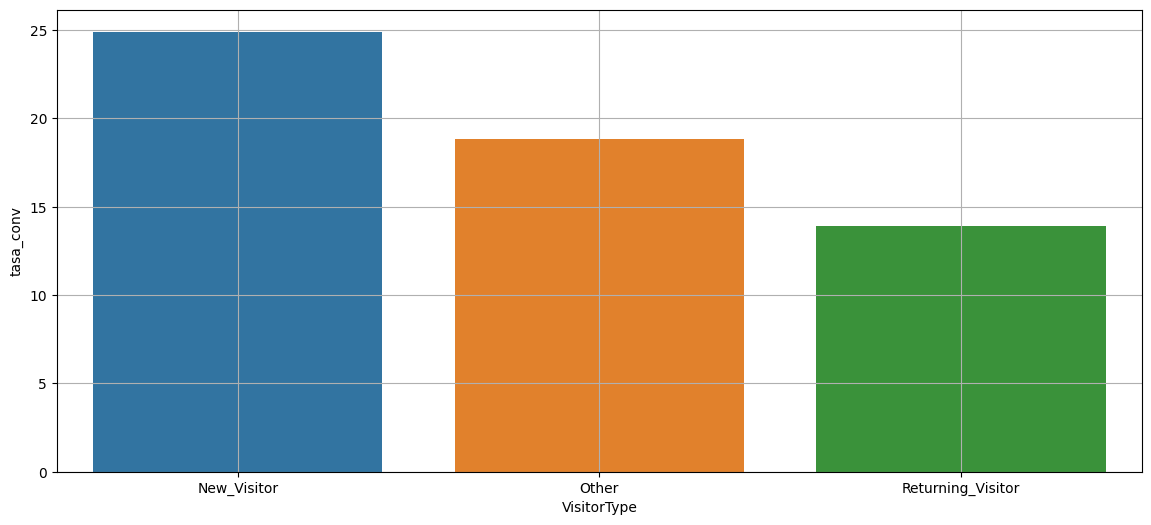

In [134]:
graficar_tasas_conversion('VisitorType', 'Revenue', type='bar')

**VisitorType**: contrario a lo esperado, los Returning Visitors son los de menor tasa de conversion, es decir, que sólo un 14% de los que vuelven terminan comprando.

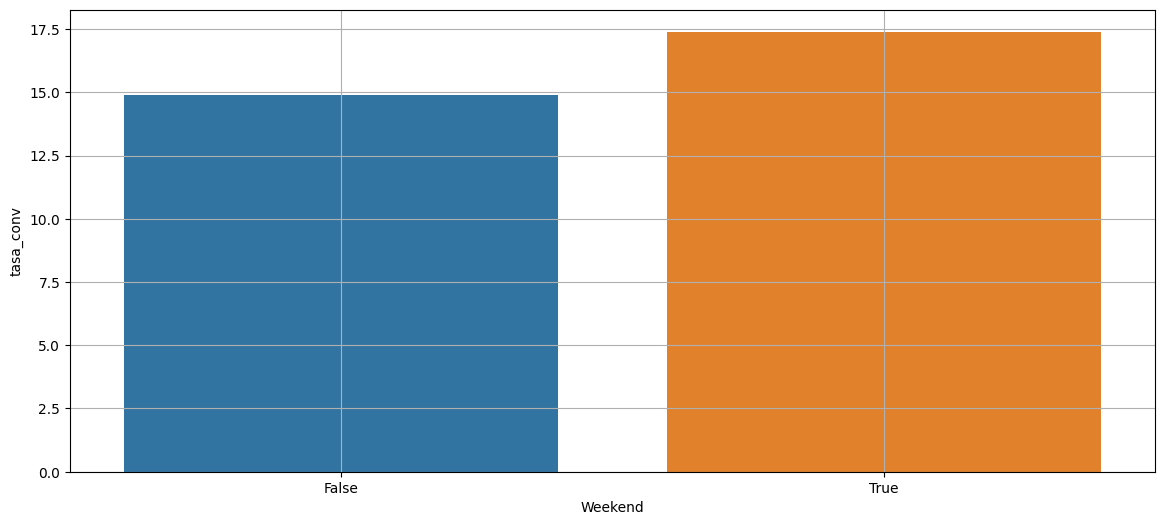

In [135]:
graficar_tasas_conversion('Weekend', 'Revenue', type='bar')

 the number of pages of this type (product related) that the user visited. 


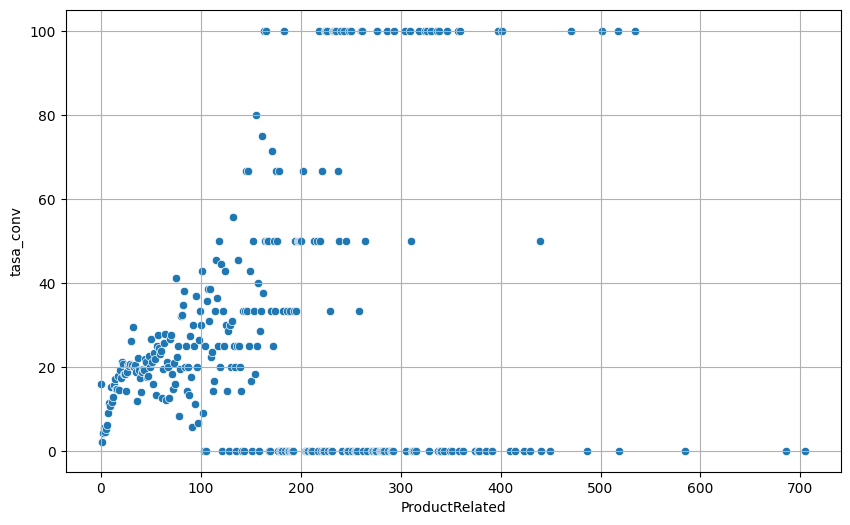

In [136]:
graficar_tasas_conversion('ProductRelated', 'Revenue', type='scatter')
print(d_desc['ProductRelated'])

Se crean grupos cada 150 para poder ver mejor la informacion

In [137]:
df1.loc[:,'grupos_ProductRelated']="0-150"
df1.loc[df1['ProductRelated']>150, 'grupos_ProductRelated']="151-300"
df1.loc[df1['ProductRelated']>300, 'grupos_ProductRelated']="301-450"
df1.loc[df1['ProductRelated']>450, 'grupos_ProductRelated']="451-600"
df1.loc[df1['ProductRelated']>600, 'grupos_ProductRelated']="601-750"

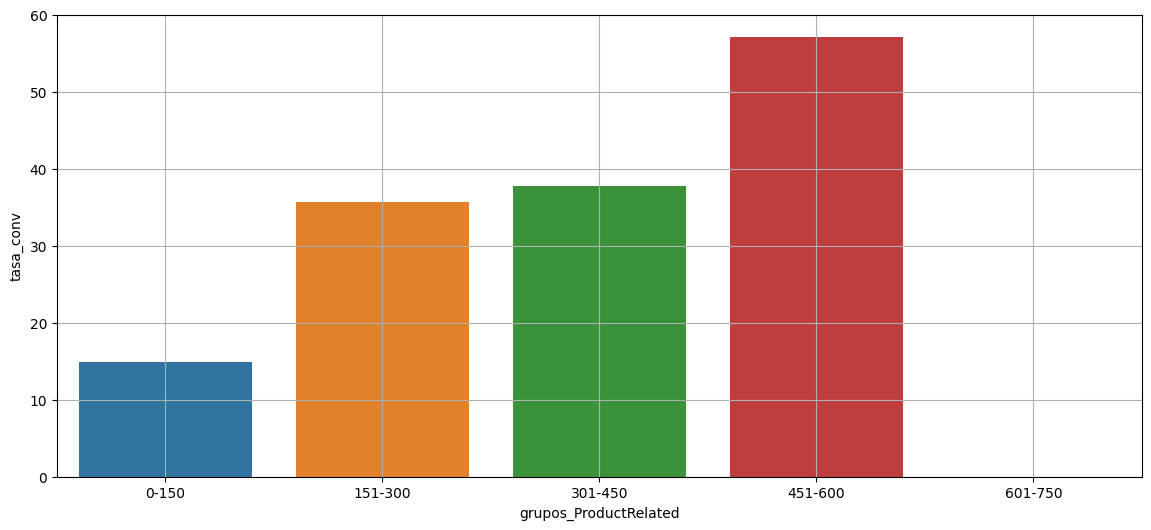

In [138]:
graficar_tasas_conversion('grupos_ProductRelated', 'Revenue', type='bar')

En estos grupos se observa que en el grupo entre 451-600 páginas visitadas de productos relacionados posee una alta tasa de compra final.

The average value of the page averaged over the value of the target page and/or the completion of an eCommerce


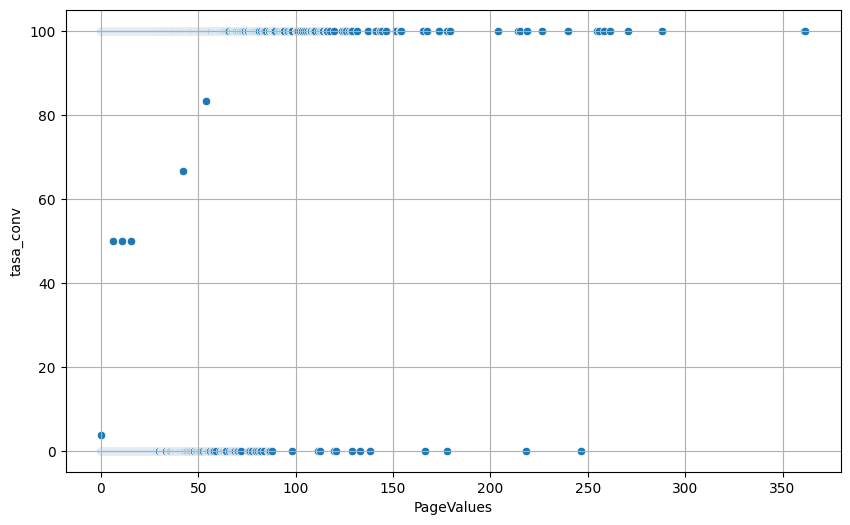

In [139]:
graficar_tasas_conversion('PageValues', 'Revenue', type='scatter')
print(d_desc['PageValues'])

In [140]:
df1.loc[:,'grupos_PageValues']="< 100"
df1.loc[df1['PageValues']>100, 'grupos_PageValues']="101-200"
df1.loc[df1['PageValues']>200, 'grupos_PageValues']="> 200"

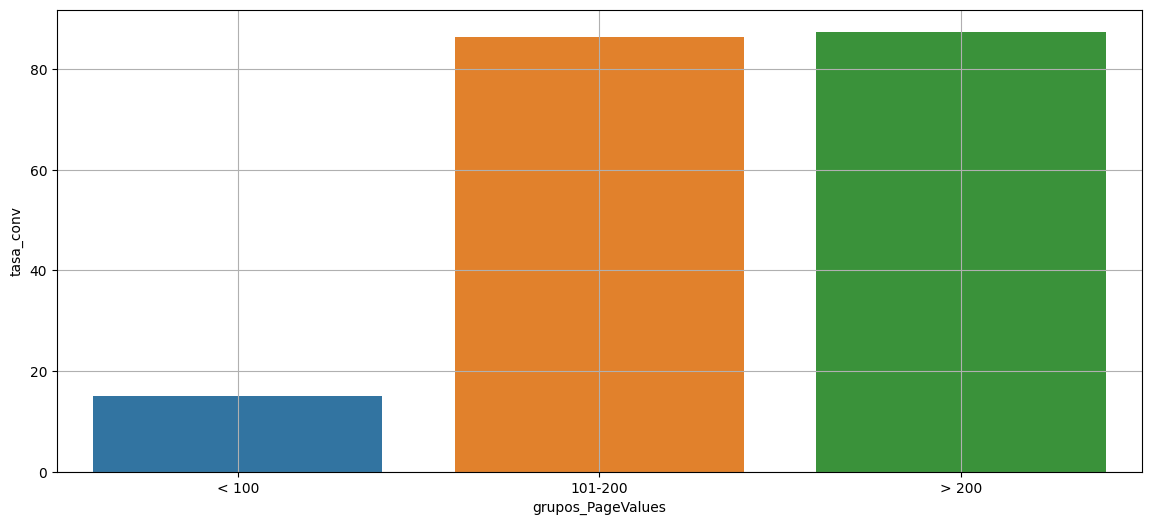

In [141]:
graficar_tasas_conversion('grupos_PageValues', 'Revenue', type='bar', order=['< 100','101-200','> 200'])


Se sigue confirmando la relación de esta variable con la decisión de compra final, para los grupos mayores a 100 un 85% de las veces se termina comprando.

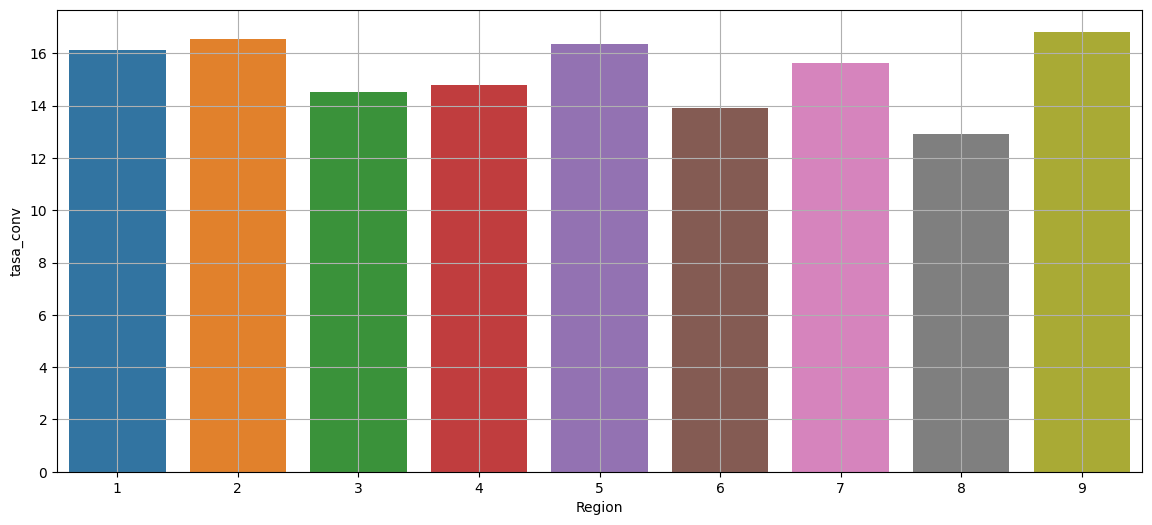

In [142]:
graficar_tasas_conversion('Region', 'Revenue', type='bar')

No se observa diferencia por Region

In [143]:
browser_count = df1.groupby('Browser', as_index=False)['Revenue'].count()
browser_count

,Browser,Revenue
0,1,2462
1,2,7961
2,3,105
3,4,736
4,5,467
5,6,174
6,7,49
7,8,135
8,9,1
9,10,163


Text(0.5, 1.0, 'Browsers')

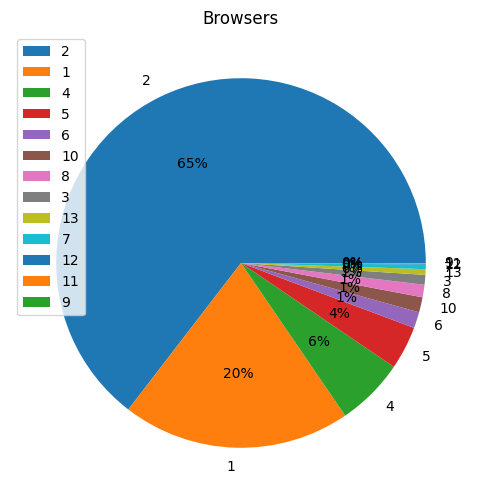

In [144]:
browser = df1['Browser'].value_counts()
plt.pie(browser, labels= browser.index, autopct='%.0f%%')
plt.legend(loc= 'upper left')
plt.title('Browsers')

In [145]:
browser

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Los navegadores más utilizados son el 2, el 1 y el 4. Entre esos 3 navegadores se realizan el 90% de las visitas a la página.

### Variable PRODUCT RELATED DURATION

### Se considera la variable Product Duration como importante ya que el tiempo que las personas dedican a una página se entiende se relaciona en forma directa con el interés de esa persona en el producto.

<Axes: xlabel='Revenue', ylabel='ProductRelated_Duration_tope'>

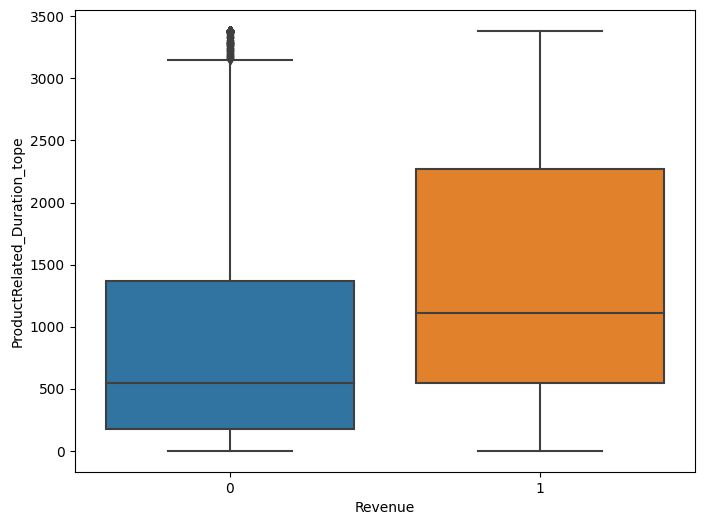

In [146]:
sns.boxplot(x="Revenue", y="ProductRelated_Duration_tope", data=df_num)

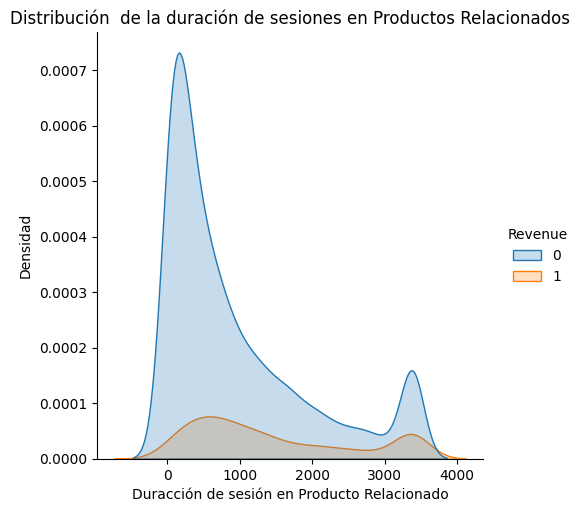

In [147]:
ax = sns.displot(data=df_num, x='ProductRelated_Duration_tope', kind='kde', hue='Revenue', fill=True)
ax.set(xlabel='Duracción de sesión en Producto Relacionado', ylabel='Densidad', title='Distribución  de la duración de sesiones en Productos Relacionados')

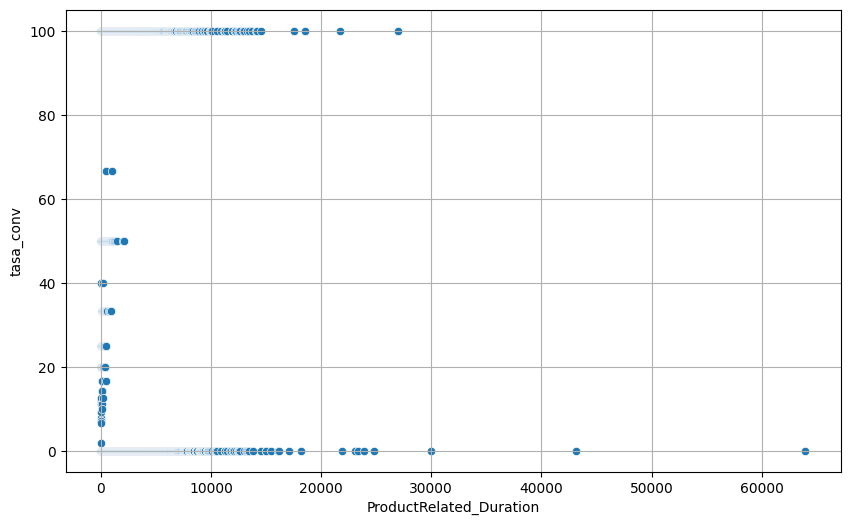

In [148]:
graficar_tasas_conversion('ProductRelated_Duration', 'Revenue', type='scatter')

In [149]:
df1.loc[:,'grupos_ProductRelated_Duration']="<5000"
df1.loc[df1['ProductRelated_Duration']>5000, 'grupos_ProductRelated_Duration']="5001-10000"
df1.loc[df1['ProductRelated_Duration']>10000, 'grupos_ProductRelated_Duration']="10001-15000"
df1.loc[df1['ProductRelated_Duration']>15000, 'grupos_ProductRelated_Duration']=">15000"

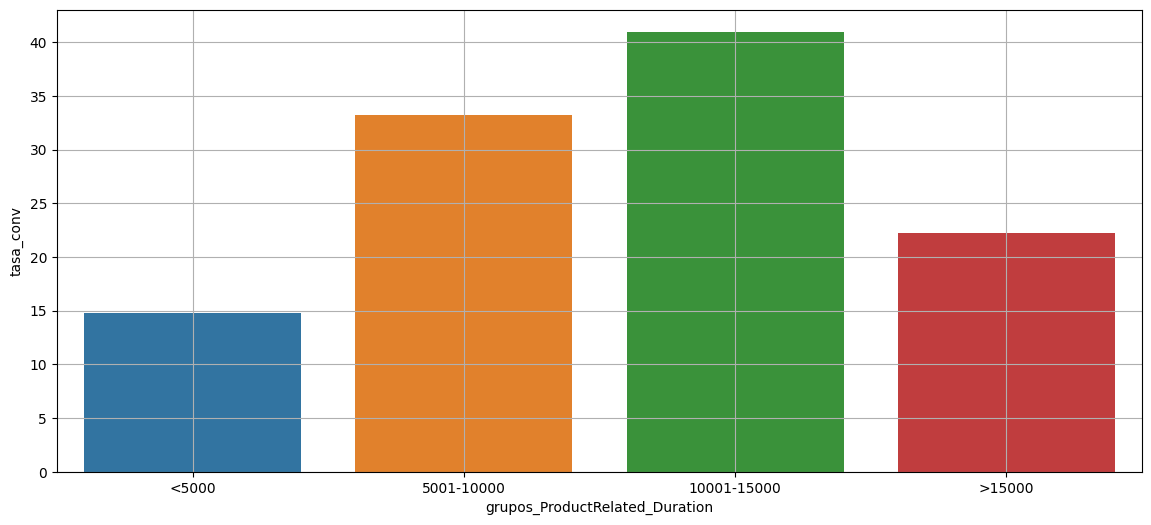

In [150]:
graficar_tasas_conversion('grupos_ProductRelated_Duration', 'Revenue', type='bar', order=['<5000','5001-10000','10001-15000','>15000'])

### Hipótesis 1
Se observa una tendencia a que la venta se concrete cuando la duración de la sesión en un producto relacionado es mayor, lo cual hace sentido considerando que la gente suele dedicar mayor tiempo a las cosas sobre las que tiene interés. Observando el gráfico de tasa de conversión también se destaca que cuando supera determinado tiempo la decisión de compra disminuye.

### 2) Variable EXIT RATES

<Axes: xlabel='Revenue', ylabel='ExitRates'>

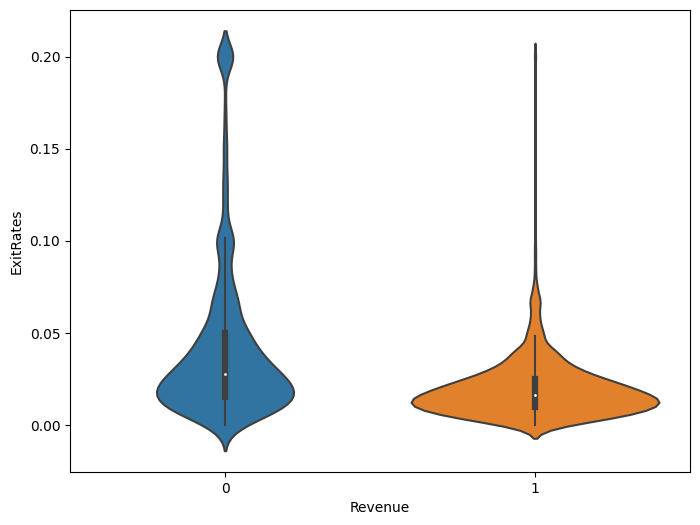

In [151]:
 sns.violinplot(x='Revenue', y='ExitRates', data=df_num)

<Axes: xlabel='ExitRates', ylabel='Count'>

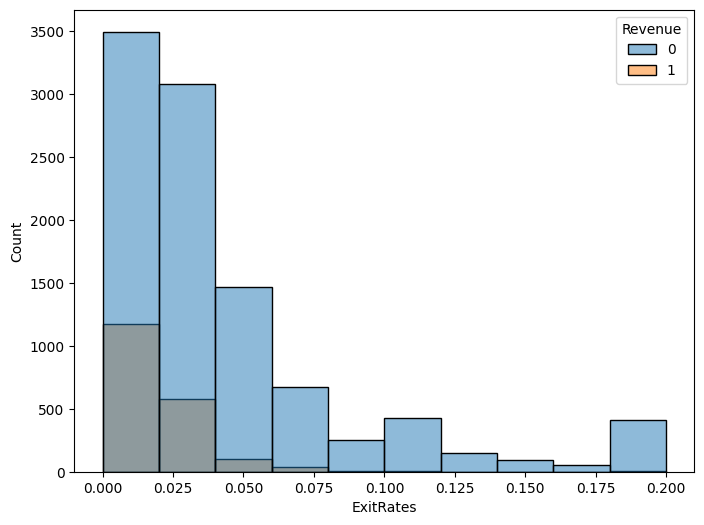

In [152]:
sns.histplot(data=df_num, x="ExitRates", hue= 'Revenue', bins= 10)

### Hipótesis 2
A mayor ExitRate no se observa una diferencia en la decisión de compra, sin embargo podemos concluir que las compras se realizan cuando el ExitRate es bajo.

### 3) Variable PAGE VALUES

<Axes: xlabel='Revenue', ylabel='PageValues'>

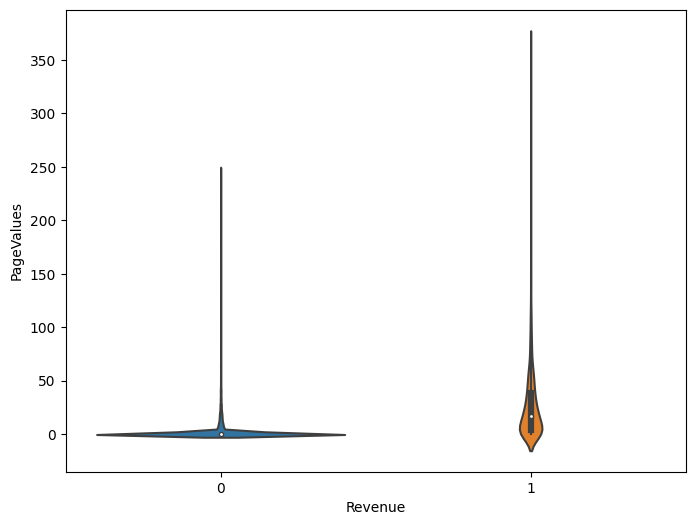

In [153]:
 sns.violinplot(x='Revenue', y='PageValues', data=df_num)

<Axes: xlabel='PageValues', ylabel='Count'>

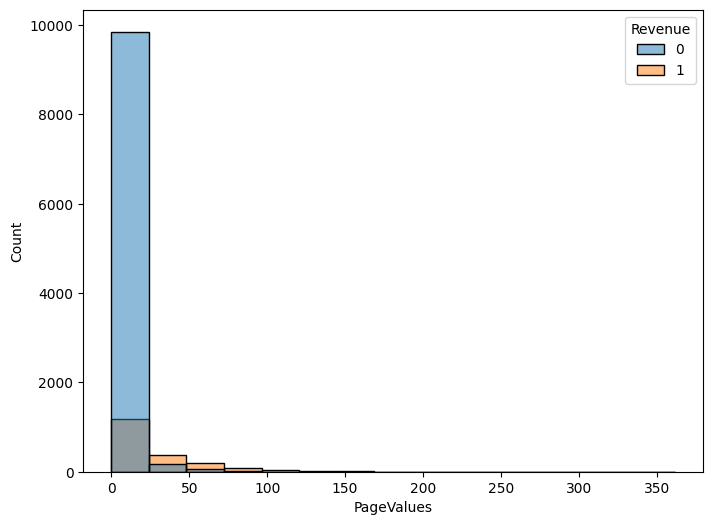

In [154]:
sns.histplot(data=df_num, x="PageValues", hue= 'Revenue')

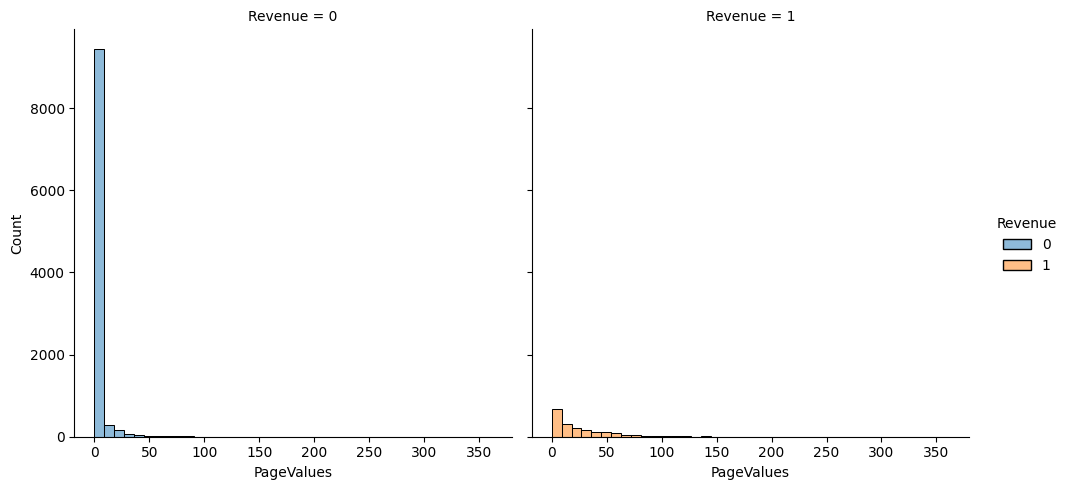

In [155]:
sns.displot(data=df_num, x="PageValues", hue="Revenue", col="Revenue", bins=40)

<Axes: xlabel='Revenue', ylabel='PageValues'>

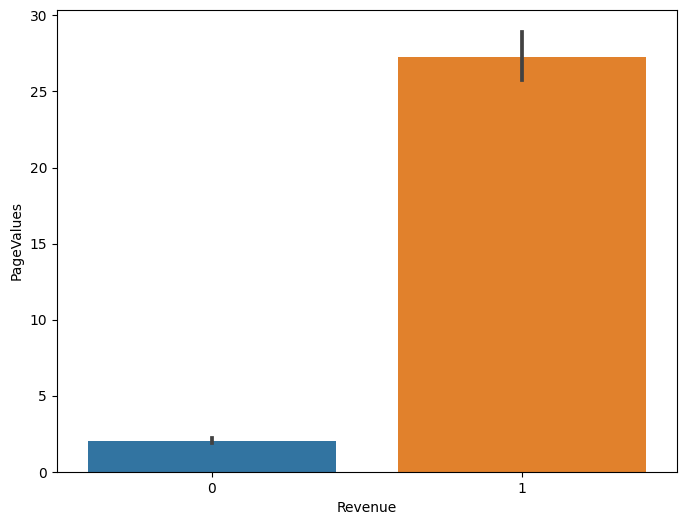

In [156]:
sns.barplot(x="Revenue", y="PageValues", data=df_num)

### Hipótesis 3
Se observa mayor intención de compra cuando el PageValue es mayor a cero

### 4) Variable SPECIAL DAY y WEEKEND

<Axes: xlabel='SpecialDay', ylabel='count'>

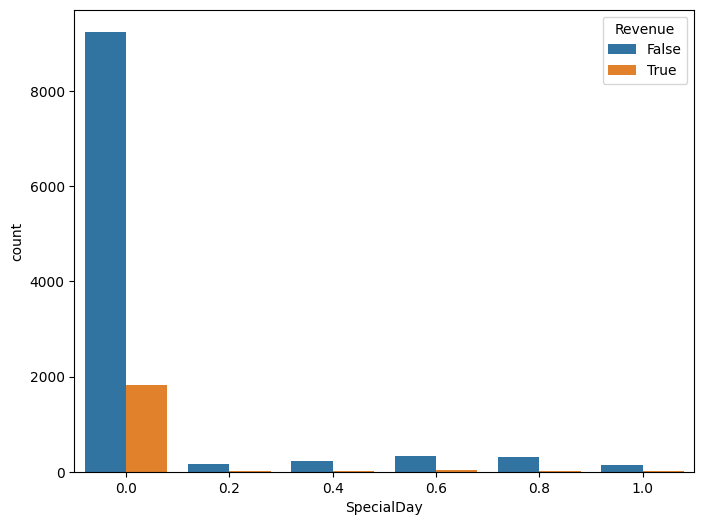

In [157]:
sns.countplot(x='SpecialDay', data = df1, hue = 'Revenue')

<Axes: xlabel='Weekend', ylabel='count'>

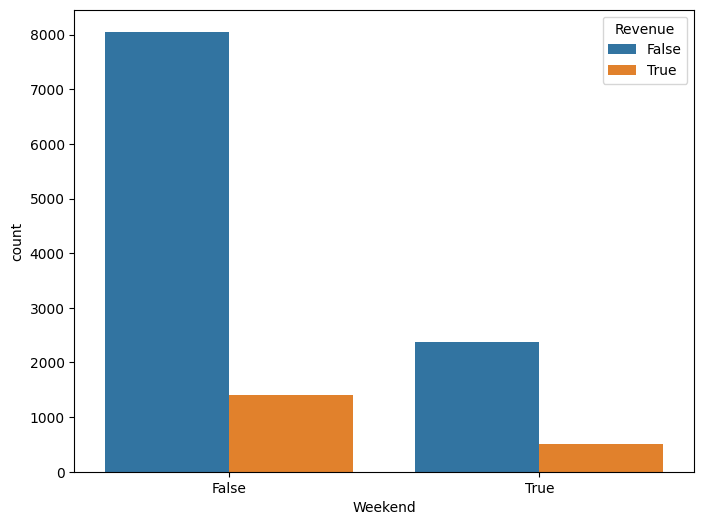

In [158]:
sns.countplot(x='Weekend', data = df1, hue = 'Revenue')

### Hipótesis 4
No se observa diferencia en la intención de compra cerca de los fines de semana o días especiales

### 5) Variable MONTH

<Axes: xlabel='Month', ylabel='Count'>

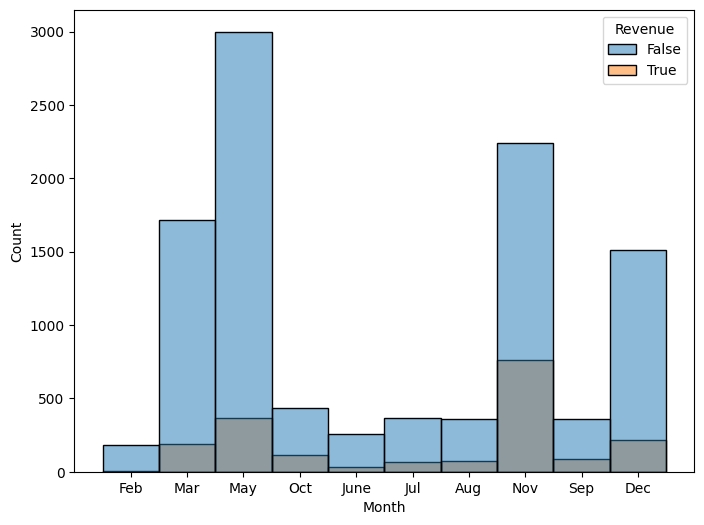

In [159]:
sns.histplot(data=df1, x="Month", hue="Revenue")

### Hipótesis 5
Se observa estacionalidad con una clara mayor intención de compra en el mes de Noviembre.

### 6) Variable VISITOR TYPE

<Axes: xlabel='VisitorType', ylabel='Count'>

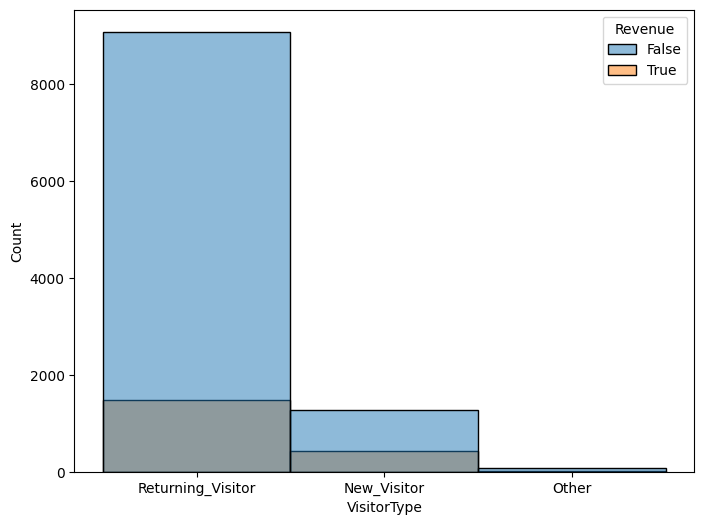

In [160]:
sns.histplot(data=df1, x="VisitorType", hue="Revenue")

### Hipótesis 6
La mayoría de las compras las realizan quienes vuelven a visitar la página, sin embargo también la mayoría de quienes visitan la página son Returning Visitors, el porcentaje de gente que termina comprando no es alto, recordemos que la tasa de compra final era mayor en visitantes nuevos.  Se recomienda realizar campañas para incrementar visitantes nuevos.

# Análisis Bivariado sobre variable a predecir

### Se tomaron las siguientes combinaciones de variables que se consideran relevantes y se analiza su correlación.

### **Tasa de conversión para 2 variables**

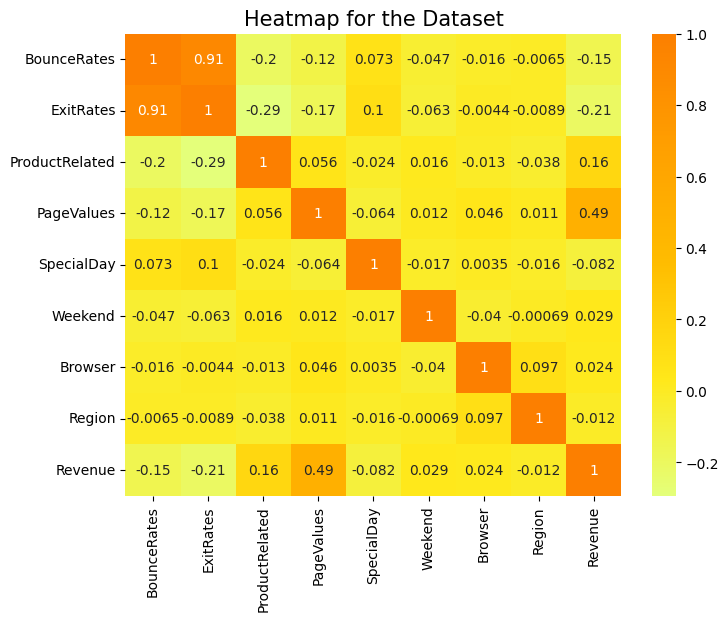

In [161]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.heatmap(df1[['BounceRates','ExitRates','ProductRelated','PageValues','SpecialDay','Weekend','Browser','Region','Revenue']].corr(),
            annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 15)
plt.show()

In [162]:
def graficar_tc_bivariada(col_list, orden=None):
    tc = df1.groupby(col_list)['Revenue'].mean().to_frame().reset_index()

    plt.figure(figsize=(13,7))
    ax = sns.pointplot(x=tc['Revenue'], y= tc[col_list[0]], hue= tc[col_list[1]], join=False)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    plt.title(f'Tasa de conversion para {col_list[0]} y {col_list[1]}')
    plt.xlabel('Tasa de conversion (%)')
    plt.xlim((0,1));

Se analizarán las siguientes combinaciones de variables:
* Month y Weekend
* PageValues y Region
* Region y ProductRelated

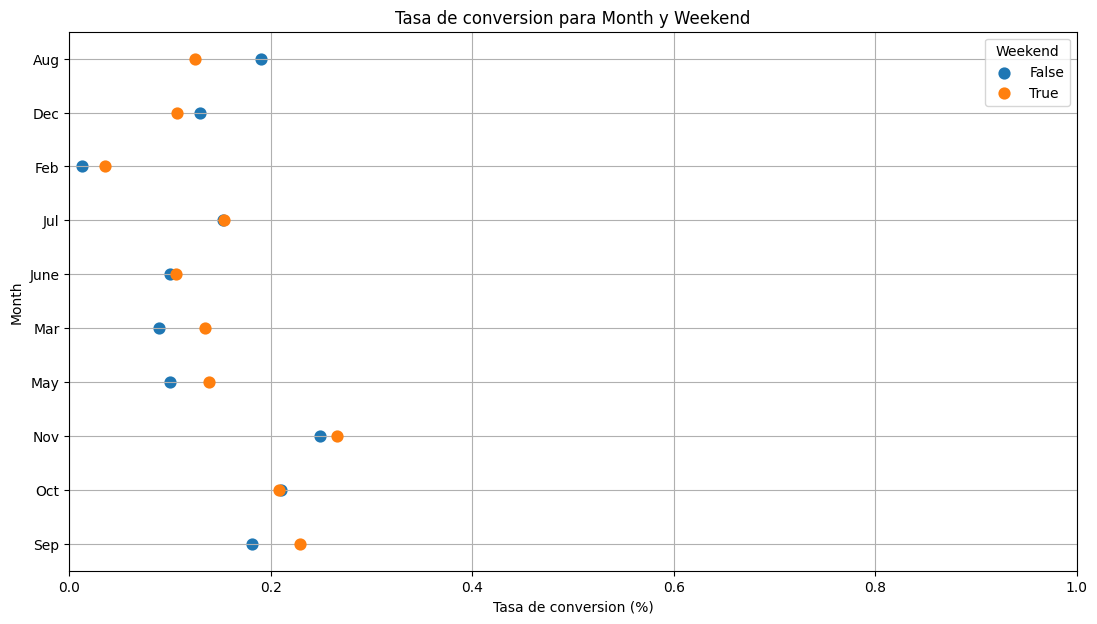

In [163]:
graficar_tc_bivariada(['Month','Weekend'])

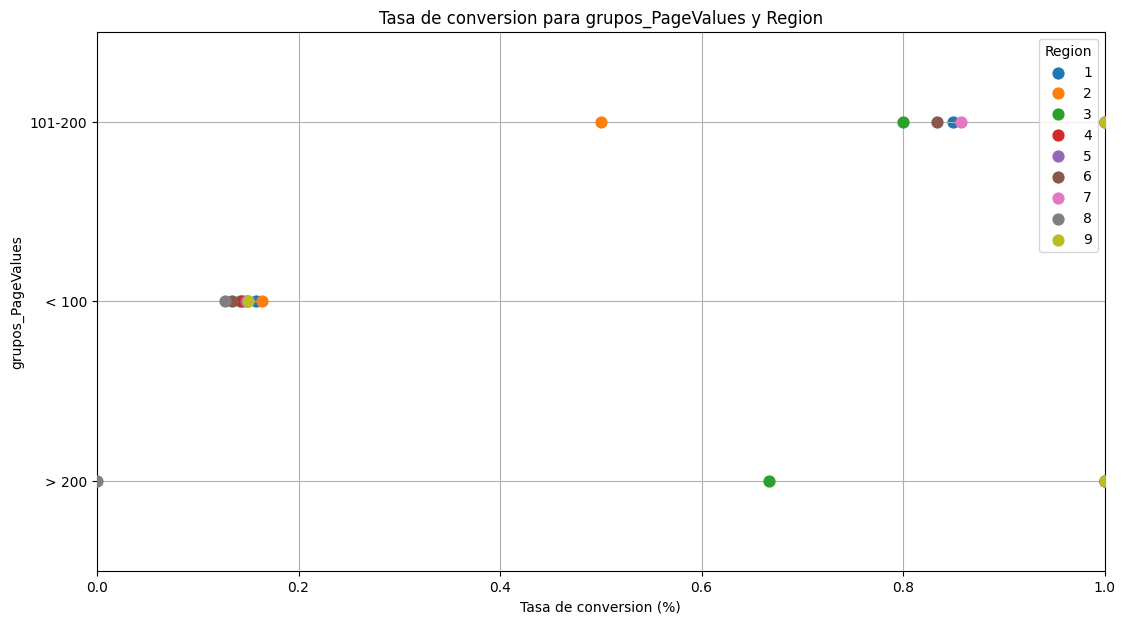

In [164]:
graficar_tc_bivariada(['grupos_PageValues','Region'])

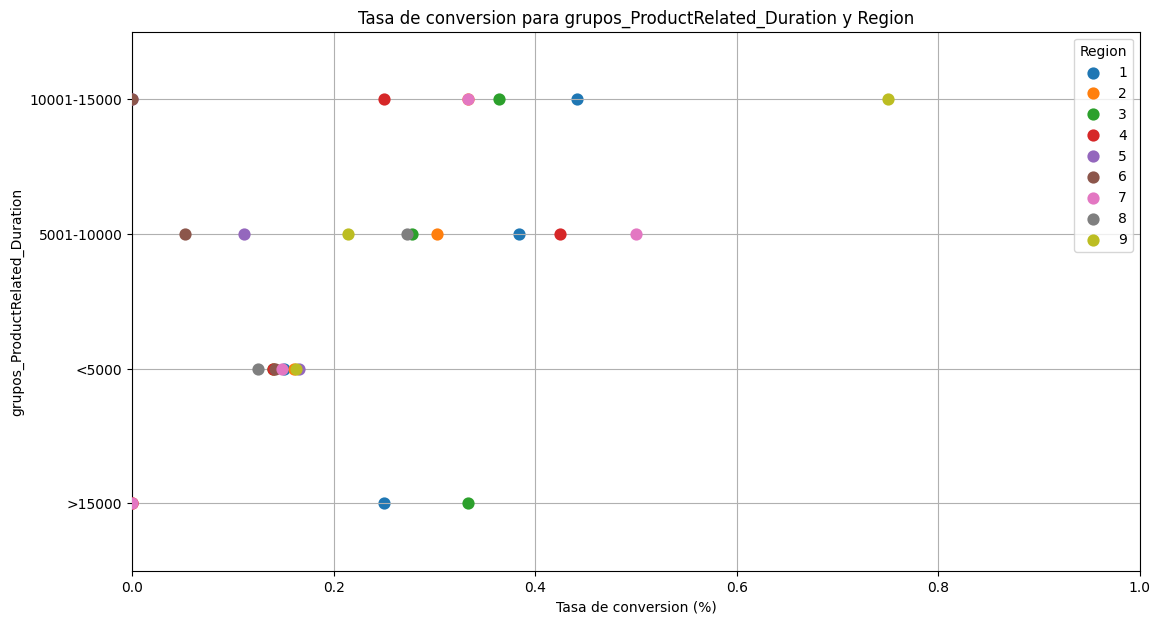

In [165]:
graficar_tc_bivariada(['grupos_ProductRelated_Duration','Region'])

In [166]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Administrative                  12330 non-null  int64  
 1   Administrative_Duration         12330 non-null  float64
 2   Informational                   12330 non-null  int64  
 3   Informational_Duration          12330 non-null  float64
 4   ProductRelated                  12330 non-null  int64  
 5   ProductRelated_Duration         12330 non-null  float64
 6   BounceRates                     12330 non-null  float64
 7   ExitRates                       12330 non-null  float64
 8   PageValues                      12330 non-null  float64
 9   SpecialDay                      12330 non-null  float64
 10  Month                           12330 non-null  object 
 11  OperatingSystems                12330 non-null  int64  
 12  Browser                         

# Label Encoder

In [167]:
df1[['Month']].value_counts()

Month
May      3364
Nov      2998
Mar      1907
Dec      1727
Oct       549
Sep       448
Aug       433
Jul       432
June      288
Feb       184
dtype: int64

In [168]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() #instanciar el objeto
df1["Month"] = encoder.fit_transform(df1["Month"])

In [169]:
df1['Month'].value_counts()

6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64

# Get Dummies sobre VisitorType, grupos_ProductRelated, grupos_PageValues

In [170]:
df1['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [171]:
df_visitor = pd.get_dummies(df1['VisitorType'])

In [173]:
df_visitor.head()

,New_Visitor,Other,Returning_Visitor
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [174]:
pd.get_dummies(df1['VisitorType'])

,New_Visitor,Other,Returning_Visitor
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
12325,0,0,1
12326,0,0,1
12327,0,0,1
12328,0,0,1


In [176]:
df2  = df1.join(df_visitor, how= 'left') #se junta por medio del indice

In [178]:
df2.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'grupos_ProductRelated', 'grupos_PageValues',
       'grupos_ProductRelated_Duration', 'New_Visitor', 'Other',
       'Returning_Visitor'],
      dtype='object')

In [179]:
df1['grupos_ProductRelated'].value_counts()

0-150      12024
151-300      252
301-450       45
451-600        7
601-750        2
Name: grupos_ProductRelated, dtype: int64

In [180]:
df_group1 = pd.get_dummies(df1['grupos_ProductRelated'])

In [181]:
pd.get_dummies(df1['grupos_ProductRelated'])

,0-150,151-300,301-450,451-600,601-750
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
12325,1,0,0,0,0
12326,1,0,0,0,0
12327,1,0,0,0,0
12328,1,0,0,0,0


In [182]:
df3  = df2.join(df_group1, how= 'left') #se junta por medio del indice

In [184]:
df1['grupos_PageValues'].value_counts()

< 100      12248
101-200       66
> 200         16
Name: grupos_PageValues, dtype: int64

In [185]:
df_group2 = pd.get_dummies(df1['grupos_PageValues'])

In [187]:
pd.get_dummies(df1['grupos_PageValues'])

,101-200,< 100,> 200
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
12325,0,1,0
12326,0,1,0
12327,0,1,0
12328,0,1,0


In [201]:
df4  = df3.join(df_group2, how= 'left') #se junta por medio del indice

In [196]:
df4.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'grupos_ProductRelated', 'grupos_PageValues',
       'grupos_ProductRelated_Duration', 'New_Visitor', 'Other',
       'Returning_Visitor', '0-150', '151-300', '301-450', '451-600',
       '601-750', '101-200', '< 100', '> 200'],
      dtype='object')

# Fase de Modelado

### Train & Test Split

In [191]:
# split del dataset
from sklearn.model_selection import train_test_split

### Elijo variables numéricas

### Transformo variable objetivo a numérica


In [202]:
 df_num1 = df4.select_dtypes('number')
 df_num1['y'] = df4['Revenue']

In [204]:
df_num1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'New_Visitor',
       'Other', 'Returning_Visitor', '0-150', '151-300', '301-450', '451-600',
       '601-750', '101-200', '< 100', '> 200', 'y'],
      dtype='object')

In [205]:
# separamos las caracteristicas/features del target
X = df_num1.drop('y', axis=1) #variables que utilizara para encontrar el patron por el cual un algoritmo encuentra esos factores por el
# una persona compra un producto financiero o NO.
y = df_num1['y'] #variables objetivo

In [206]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (9864, 26)
Tamaño del set de testeo: (2466, 26)


# Regresion Logística

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)
X1 = pd.DataFrame(data = X1, columns= X.columns)


In [208]:
X1 # (obv - promedio)/ desviacion estandar

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Other,Returning_Visitor,0-150,151-300,301-450,451-600,601-750,101-200,< 100,> 200
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X1, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)



print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (9864, 26)
Tamaño del set de testeo: (2466, 26)


In [210]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train) # 1 Paso y 2# Se hace al mismo tiempo

In [211]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [214]:
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8868613138686131


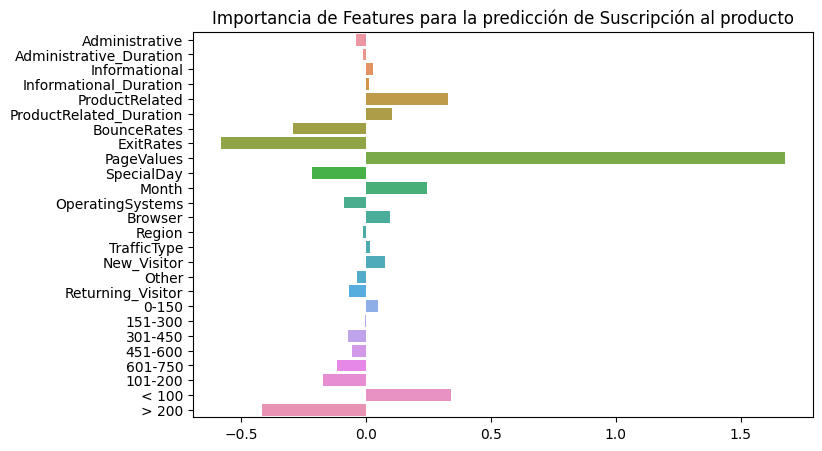

In [215]:
plt.figure(figsize=(8,5))

values = pd.Series(clf.coef_.flat)

sns.barplot(y=X.columns,
            x=values,
           ).set(title='Importancia de Features para la predicción de Suscripción al producto')

plt.show()